<a href="https://colab.research.google.com/github/e76971072/ehr-deeplearning-concept-based-model/blob/main/CS_598_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import logging, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyhealth
import random
import torch
import os


seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
os.environ["PYTHONHASHSEED"] = str(seed)

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'pyhealth'

In [ ]:
! pip install pyhealth

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━

## MIMIC-III Table

### 1. Admissions (`ADMISSIONS`)
- Contains patient admission and discharge information.
- **Primary Key**: `HADM_ID`
- Includes discharge type (death, transfer, etc.).
- **Note**: All timestamps are randomly shifted to protect patient privacy.
- **Tip**: Use **metavision** admissions (`DB_SOURCE = metavision`) for consistent medication vocabularies.

### 2. Lab Events (`LABEVENTS`)
- Records lab test results.
- **Key Columns**:
  - `ITEMID`: Defines lab test (refer to `D_LABITEMS` for descriptions).
  - `CHARTTIME`: Time when test result was recorded.
  - `VALUE`, `VALUENUM`, `VALUEUOM`: Measurement values and units.
  - `FLAG`: Marks abnormal results.
- **Tip**: Create time-series models using lab events.

### 3. Medications (`INPUTEVENTS_MV`)
- Logs medication administrations.
- **Key Columns**:
  - `STARTTIME`, `ENDTIME`: Time interval of administration.
  - `ITEMID`: Defines medication (refer to `D_ITEMS`).
  - Includes dosages and infusion rates.
- **Tip**: Use only `INPUTEVENTS_MV` (Metavision system) for medications.

### 4. Chart Events (`CHARTEVENTS`)
- Records **vital signs** like blood pressure, heart rate, temperature, etc.
- **Key Columns**:
  - `ITEMID`: Defines type of reading (refer to `D_ITEMS`).
  - `CHARTTIME`: Timestamp of measurement.
  - `VALUE`: Observed value.
- **Tip**: Can be used for numerical time-series modeling.

### 5. Procedures (`PROCEDURES_ICD`)
- Lists **procedures** performed during an admission.
- **Key Columns**:
  - `ICD9_CODE`: ICD-9 procedure code.
  - `PROCEDURE_CATEGORY`: Predefined procedure category (recommended for modeling).
  - Reference table: `D_ICD_PROCEDURES`.

### 6. Diagnoses (`DIAGNOSES_ICD`)
- Lists **diagnoses** assigned during an admission.
- **Key Columns**:
  - `ICD9_CODE`: ICD-9 diagnosis code.
  - Reference table: `D_ICD_DIAGNOSES`.

### 7. Microbiology (`MICROBIOLOGYEVENTS`)
- Tracks **infection-related tests**.
- **Tip**: Presence of tests alone indicates **suspicion of infection**.
- May include sensitivity results to specific drugs.

### 8. Text Records (`NOTEEVENTS`)
- Contains **clinician notes**:
  - **Progress notes** (daily updates on patient status).
  - **Discharge notes**.

## Additional Tables (Event Detection)

### 1. Sepsis Detection (`SEPSIS_TABLE`)
- Records estimated **sepsis events** over time.
- Useful for **early sepsis detection models**.

### 2. Acute Kidney Injury (AKI) (`AKI_TABLE`)
- Tracks **AKI severity levels** (0 = no AKI, 1-3 indicate severity).
- Derived from **creatinine levels**.
- **Note**: AKI scores are clinically relevant only for patients **without chronic kidney disease**.

## Predictive Modeling Opportunities

You can define and predict various events, including:
- **Sepsis onset** (using `SEPSIS_TABLE`)
- **AKI progression** (using `AKI_TABLE`)
- **Mortality risk** (using `ADMISSIONS.deathtime`)
- **ICU discharge** (using `ADMISSIONS.dischargetime`)



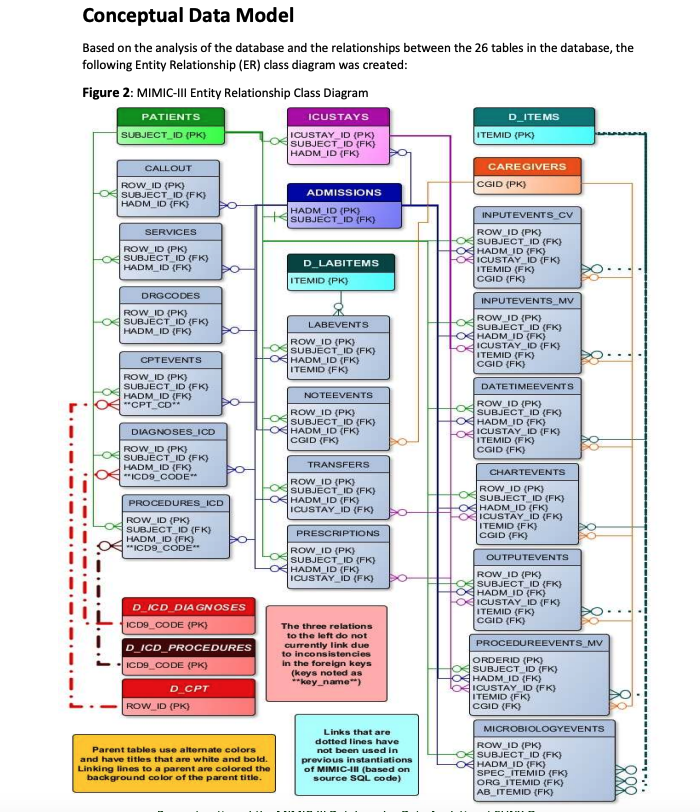


In [ ]:
!pip install pyhealth

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━

In [ ]:
data =  pd.read_csv ( '/content/drive/MyDrive/CS-598-DLH/1.4/CALLOUT.csv.gz', compression= 'gzip')

In [ ]:
data.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0,...,Inactive,Discharged,29.0,Acknowledged,2146-10-05 13:16:55,2146-10-05 13:16:55,2146-10-05 13:24:00,2146-10-05 18:55:22,2146-10-05 15:27:44,NaN
1,403,864,138624,15.0,NaN,55.0,CSRU,55,CSURG,0,...,Inactive,Discharged,55.0,Acknowledged,2114-11-28 08:31:39,2114-11-28 09:42:08,2114-11-28 09:43:08,2114-11-28 12:10:02,NaN,NaN
2,404,864,138624,12.0,NaN,55.0,CSRU,55,CSURG,1,...,Inactive,Discharged,55.0,Acknowledged,2114-11-30 10:24:25,2114-12-01 09:06:18,2114-12-01 12:26:05,2114-12-01 21:55:05,NaN,NaN
3,405,867,184298,7.0,NaN,17.0,CCU,17,CCU,1,...,Inactive,Discharged,17.0,Acknowledged,2136-12-29 08:45:42,2136-12-29 10:17:16,2136-12-29 10:33:51,2136-12-29 18:10:02,NaN,NaN
4,157,306,167129,57.0,NaN,3.0,SICU,44,NSURG,1,...,Inactive,Discharged,3.0,Acknowledged,2199-09-18 11:47:47,2199-09-18 11:47:47,2199-09-18 11:58:33,2199-09-18 15:10:02,NaN,NaN
